Question 7 -
Using the data from Question 4, write code to analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions for better visualizations
2. Write code comments wherever required for code understanding
Insights to be drawn -
● Get all the Earth meteorites that fell before the year 2000

● Get all the earth meteorites co-ordinates who fell before the year 1970

● Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more
than 10000kg

In [8]:
import json
from urllib.request import urlopen
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


url = "https://data.nasa.gov/resource/y77d-th95.json"
response = urlopen(url)

# from url in data to json
data_json = json.loads(response.read())

#converting into datafame
df = pd.DataFrame(data_json)

#trimming unnecessary columns
df = df[["name","id", "nametype","recclass","mass","fall","year","reclat","reclong","geolocation"]]

In [9]:
df.sample(2)

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation
344,Gualeguaychú,11432,Valid,H6,22000,Fell,1932-01-01T00:00:00.000,-33.000000,-58.616670,"{'type': 'Point', 'coordinates': [-58.61667, -..."
964,Suizhou,23738,Valid,L6,260000,Fell,1986-01-01T00:00:00.000,31.616670,113.466670,"{'type': 'Point', 'coordinates': [113.46667, 3..."


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         1000 non-null   object
 1   id           1000 non-null   object
 2   nametype     1000 non-null   object
 3   recclass     1000 non-null   object
 4   mass         972 non-null    object
 5   fall         1000 non-null   object
 6   year         999 non-null    object
 7   reclat       988 non-null    object
 8   reclong      988 non-null    object
 9   geolocation  988 non-null    object
dtypes: object(10)
memory usage: 78.2+ KB


In [11]:
#● Get all the Earth meteorites that fell before the year 2000
df['date'] = pd.to_datetime(df['year'], errors = 'coerce')
df_2T = df[df['date'].dt.year < 2000]
df_2T

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation,date
0,Aachen,1,Valid,L5,21,Fell,1880-01-01T00:00:00.000,50.775000,6.083330,"{'type': 'Point', 'coordinates': [6.08333, 50....",1880-01-01
1,Aarhus,2,Valid,H6,720,Fell,1951-01-01T00:00:00.000,56.183330,10.233330,"{'type': 'Point', 'coordinates': [10.23333, 56...",1951-01-01
2,Abee,6,Valid,EH4,107000,Fell,1952-01-01T00:00:00.000,54.216670,-113.000000,"{'type': 'Point', 'coordinates': [-113, 54.216...",1952-01-01
3,Acapulco,10,Valid,Acapulcoite,1914,Fell,1976-01-01T00:00:00.000,16.883330,-99.900000,"{'type': 'Point', 'coordinates': [-99.9, 16.88...",1976-01-01
4,Achiras,370,Valid,L6,780,Fell,1902-01-01T00:00:00.000,-33.166670,-64.950000,"{'type': 'Point', 'coordinates': [-64.95, -33....",1902-01-01
...,...,...,...,...,...,...,...,...,...,...,...
994,Timochin,24004,Valid,H5,65500,Fell,1807-01-01T00:00:00.000,54.500000,35.200000,"{'type': 'Point', 'coordinates': [35.2, 54.5]}",1807-01-01
995,Tirupati,24009,Valid,H6,230,Fell,1934-01-01T00:00:00.000,13.633330,79.416670,"{'type': 'Point', 'coordinates': [79.41667, 13...",1934-01-01
997,Tjabe,24011,Valid,H6,20000,Fell,1869-01-01T00:00:00.000,-7.083330,111.533330,"{'type': 'Point', 'coordinates': [111.53333, -...",1869-01-01
998,Tjerebon,24012,Valid,L5,16500,Fell,1922-01-01T00:00:00.000,-6.666670,106.583330,"{'type': 'Point', 'coordinates': [106.58333, -...",1922-01-01


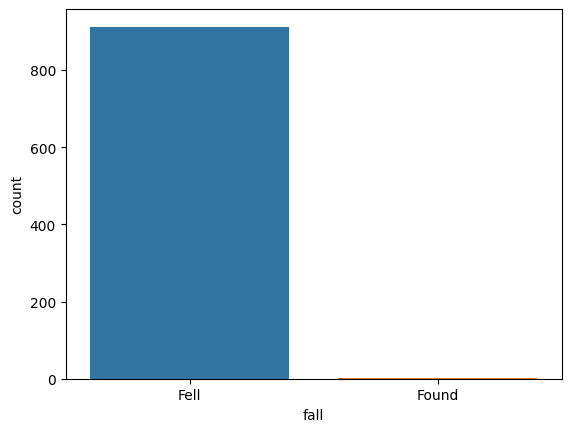

In [17]:
#Get all the Earth meteorites that fell before the year 2000

sns.countplot(x='fall', data=df[df['date'].dt.year < 2000])
sns.countplot(x='fall', data=df[df['date'].dt.year > 2000])
plt.show()

In [154]:
#Get all the earth meteorites co-ordinates who fell before the year 1970

# filtering records before the year 1970
dd = df[df['date'].dt.year < 1970]

# converting geolocation volumn into series and than acessign coordinates values..
dd['cordinates'] = dd['geolocation'].apply(pd.Series)['coordinates']#['type'])

dd.sample(3)

# dd[']

C:\Users\Darshi\AppData\Local\Temp\ipykernel_14912\987589613.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd['cordinates'] = dd['geolocation'].apply(pd.Series)['coordinates']#['type'])


,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation,date,cordinates
566,Macibini,15372,Valid,Eucrite-pmict,1995,Fell,1936-01-01T00:00:00.000,-28.833330,31.950000,"{'type': 'Point', 'coordinates': [31.95, -28.8...",1936-01-01,"[31.95, -28.83333]"
330,Glanggang,10924,Valid,H5-6,1303,Fell,1939-01-01T00:00:00.000,-7.250000,107.700000,"{'type': 'Point', 'coordinates': [107.7, -7.25]}",1939-01-01,"[107.7, -7.25]"
265,Duwun,7754,Valid,L6,2117,Fell,1943-01-01T00:00:00.000,33.433330,127.266670,"{'type': 'Point', 'coordinates': [127.26667, 3...",1943-01-01,"[127.26667, 33.43333]"


In [155]:
# Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more than 10000kg

#need to covert mass column into float first..
df['mass'] = df['mass'].fillna(0).astype(float)

df[df['mass'] > 10000]


,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation,date
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01T00:00:00.000,54.216670,-113.000000,"{'type': 'Point', 'coordinates': [-113, 54.216...",1952-01-01
7,Agen,392,Valid,H5,30000.0,Fell,1814-01-01T00:00:00.000,44.216670,0.616670,"{'type': 'Point', 'coordinates': [0.61667, 44....",1814-01-01
11,Aïr,424,Valid,L6,24000.0,Fell,1925-01-01T00:00:00.000,19.083330,8.383330,"{'type': 'Point', 'coordinates': [8.38333, 19....",1925-01-01
16,Akyumak,433,Valid,"Iron, IVA",50000.0,Fell,1981-01-01T00:00:00.000,39.916670,42.816670,"{'type': 'Point', 'coordinates': [42.81667, 39...",1981-01-01
27,Alfianello,466,Valid,L6,228000.0,Fell,1883-01-01T00:00:00.000,45.266670,10.150000,"{'type': 'Point', 'coordinates': [10.15, 45.26...",1883-01-01
...,...,...,...,...,...,...,...,...,...,...,...
991,Tieschitz,23989,Valid,H/L3.6,28000.0,Fell,1878-01-01T00:00:00.000,49.600000,17.116670,"{'type': 'Point', 'coordinates': [17.11667, 49...",1878-01-01
992,Tilden,23998,Valid,L6,74800.0,Fell,1927-01-01T00:00:00.000,38.200000,-89.683330,"{'type': 'Point', 'coordinates': [-89.68333, 3...",1927-01-01
994,Timochin,24004,Valid,H5,65500.0,Fell,1807-01-01T00:00:00.000,54.500000,35.200000,"{'type': 'Point', 'coordinates': [35.2, 54.5]}",1807-01-01
997,Tjabe,24011,Valid,H6,20000.0,Fell,1869-01-01T00:00:00.000,-7.083330,111.533330,"{'type': 'Point', 'coordinates': [111.53333, -...",1869-01-01
